Performance analysis for NNPZ using different input sizes.
See the [task #15623](https://redmine.isdc.unige.ch/issues/15623).

### System information (piecld00)

* Memory: 7.78 GB
* CPU: Intel(R) Xeon(R) CPU X3440  @ 2.53GHz
    * L3: 8192 KB
    * L2: 256 KB

## Performance of NNPZ

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy.table import Table

In [5]:
perf_data = Table.read('nnpz_perf_size_hdd.csv')\
    .group_by('Input').groups.aggregate(np.mean)

<IPython.core.display.Javascript object>


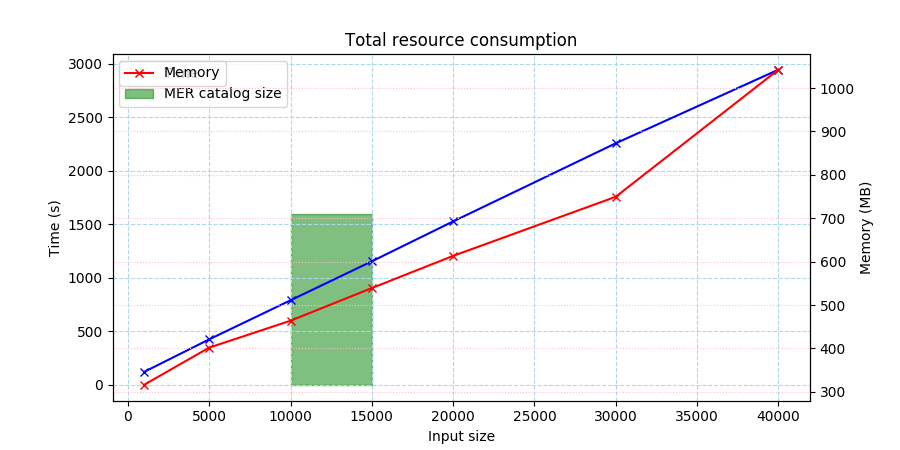

In [6]:
expected_catalog_size = patches.Rectangle(
    (10000,0), 5000, 1600,
    color='green', alpha=0.5,
    label='MER catalog size'
)

fig, ax = plt.subplots(1, figsize=(9, 4.5))
ax.add_patch(expected_catalog_size)

ax.plot(perf_data['Input'], perf_data['Time'], '-x', c='b', label='Time')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (s)')

ax.legend()
ax.grid(linestyle='--', c='lightblue')

twin = ax.twinx()
twin.plot(perf_data['Input'], perf_data['MaxMemory'], '-x', c='r', label='Memory')
twin.set_ylabel('Memory (MB)')
twin.legend()
twin.grid(linestyle=':', c='pink')

_ = ax.set_title('Total resource consumption')

<IPython.core.display.Javascript object>


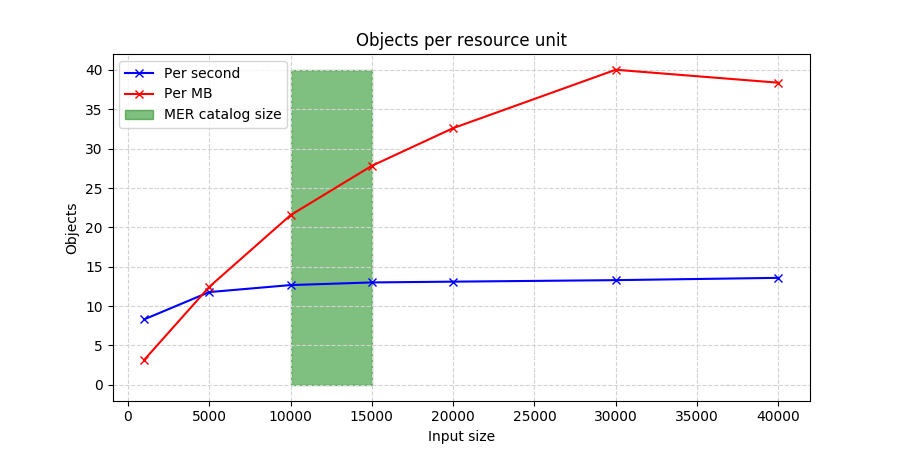

In [7]:
expected_catalog_size = patches.Rectangle(
    (10000,0), 5000, 40,
    color='green', alpha=0.5,
    label='MER catalog size'
)

fig, ax = plt.subplots(1, figsize=(9, 4.5))
ax.add_patch(expected_catalog_size)

ax.plot(perf_data['Input'], perf_data['Input'] / perf_data['Time'], '-x', c='b', label='Per second')
ax.plot(perf_data['Input'], perf_data['Input'] / perf_data['MaxMemory'], '-x', c='r', label='Per MB')

ax.grid(linestyle='--', c='lightgrey')
ax.set_xlabel('Input size')
ax.set_ylabel('Objects')
ax.legend()
_ = ax.set_title('Objects per resource unit')